In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score

import matplotlib.pylab as plt
from scipy.optimize import minimize
from scipy.spatial import distance
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import cdist

from sklearn.cluster import KMeans
from scipy.stats import mannwhitneyu
from statannot import add_stat_annotation
from sklearn.manifold import TSNE
from lifelines.statistics import logrank_test

%matplotlib inline

### Read data + perform clustering

In [2]:
clinical_df = pd.read_csv('Data/Clinical_data.csv')
clinical_df.set_index('Unnamed: 0', inplace=True)

cell_types = clinical_df.columns[-22:-8]
cell_props = clinical_df[cell_types]
cell_props.head()

,Plasma cells,CD8 T cells,$\gamma \delta$ T cells,Monocytes,M0 Macrophages,M1 Macrophages,M2 Macrophages,Eosinophils,Neutrophils,B cells,CD4 T cells,NK cells,Mast cells,Dendritic cells
Unnamed: 0,,,,,,,,,,,,,,
TARGET-40-PALWWX,0.001612,0.019150,0.000000,0.021182,0.337501,0.014729,0.268262,0.000417,0.004171,0.016882,0.212254,0.031776,0.050341,0.021723
TARGET-40-PAMEKS,0.000000,0.007041,0.000000,0.000000,0.478539,0.020840,0.228957,0.008080,0.000601,0.011240,0.174602,0.041407,0.024465,0.004228
TARGET-40-PAMLKS,0.000000,0.009725,0.006229,0.004969,0.470451,0.018512,0.240963,0.007016,0.003825,0.017093,0.139754,0.036698,0.038761,0.006004
TARGET-40-PAMRHD,0.000000,0.000000,0.013113,0.000000,0.413222,0.009920,0.357747,0.002680,0.001676,0.008315,0.126600,0.027910,0.034829,0.003988
TARGET-40-PAMYYJ,0.000537,0.007270,0.024674,0.000000,0.407861,0.021669,0.271210,0.000000,0.000000,0.008262,0.133511,0.030672,0.074114,0.020221


In [3]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,12) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(cell_props) 
    kmeanModel.fit(cell_props)     
      
    distortions.append(sum(np.min(cdist(cell_props, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / cell_props.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(cell_props, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / cell_props.shape[0] 
          
    mapping2[k] = kmeanModel.inertia_ 

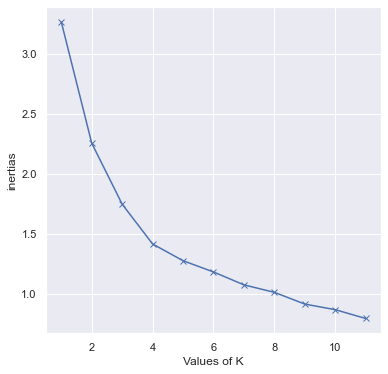

In [4]:
sns.set(rc={'figure.figsize':(6,6)})

plt.figure
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('inertias') 

plt.show()


In [5]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(cell_props)

# clinical_cluster_df = clinical_df.copy()
# clinical_cluster_df['Cluster'] = y
# clinical_cluster_df.to_csv('Data/Clinical_data_cluster.csv')

## Figure 1

Text(887.1249999999999, 0.5, '')

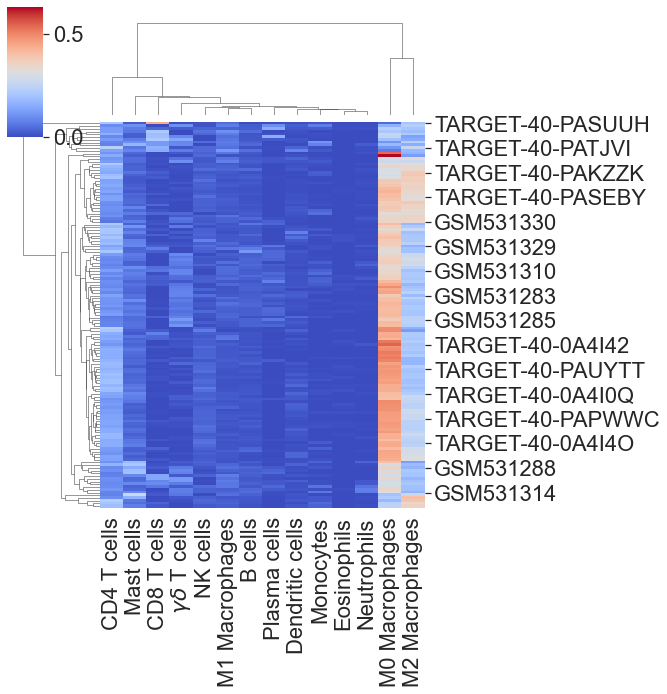

In [6]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set(font_scale=2)

g=sns.clustermap(cell_props,cmap='coolwarm')
ax = g.ax_heatmap
ax.set_xlabel("")
ax.set_ylabel("")

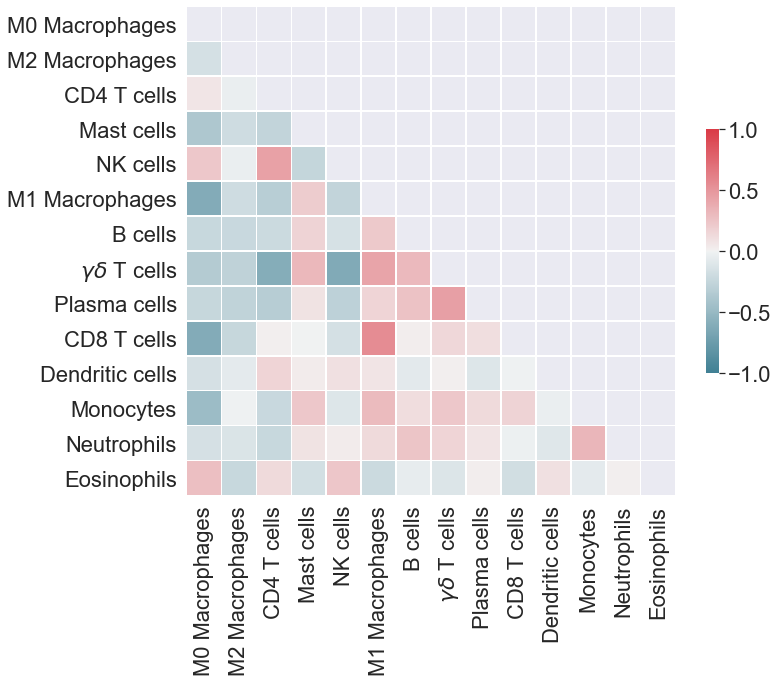

In [7]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#reorder data for corr plot:
cd = cell_props[['M0 Macrophages','M2 Macrophages','CD4 T cells','Mast cells','NK cells','M1 Macrophages','B cells',
                 '$\gamma \delta$ T cells','Plasma cells','CD8 T cells','Dendritic cells','Monocytes','Neutrophils', 'Eosinophils']]

sns.set(style="white")

# Compute the correlation matrix
corr = cd.corr()
sns.set(font_scale=2)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

([<matplotlib.axis.XTick at 0x25bff5a4518>,
 [Text(0.0, 0, '0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1')])

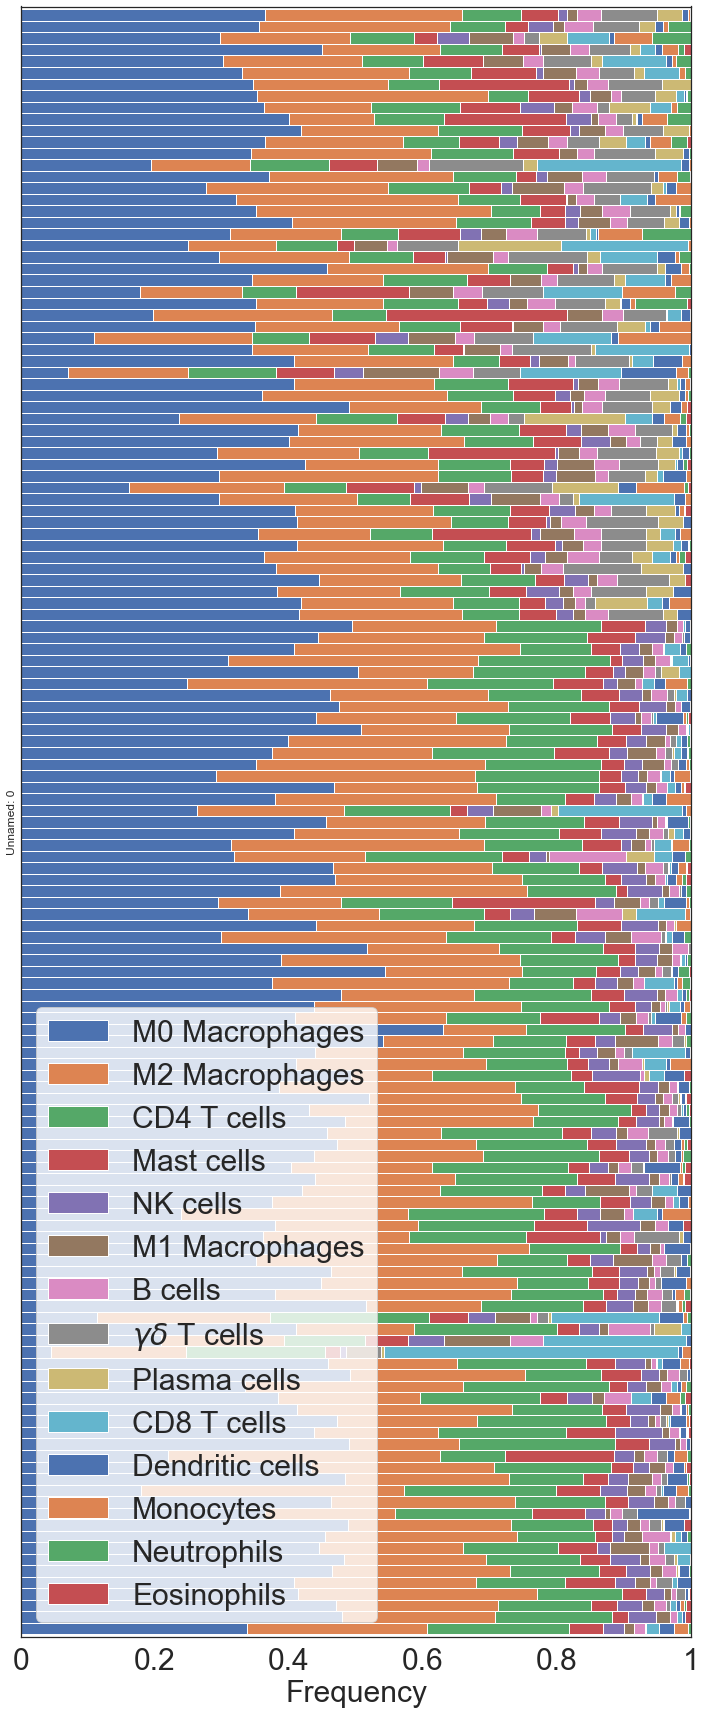

In [8]:
sns.set(rc={'figure.figsize':(12,30)})
sns.set_style("white")

ax=cd.plot.barh(stacked=True,width=1)
plt.legend(loc="lower left", fontsize=30)


plt.margins(0, 0)
plt.xlabel('Frequency', fontsize=30)
plt.yticks([],  fontsize=20)
plt.xticks([0,0.2,0.4,0.6,0.8,1], [0,0.2,0.4,0.6,0.8,1],  fontsize=30)

Text(0, 0.5, 'Frequencey')

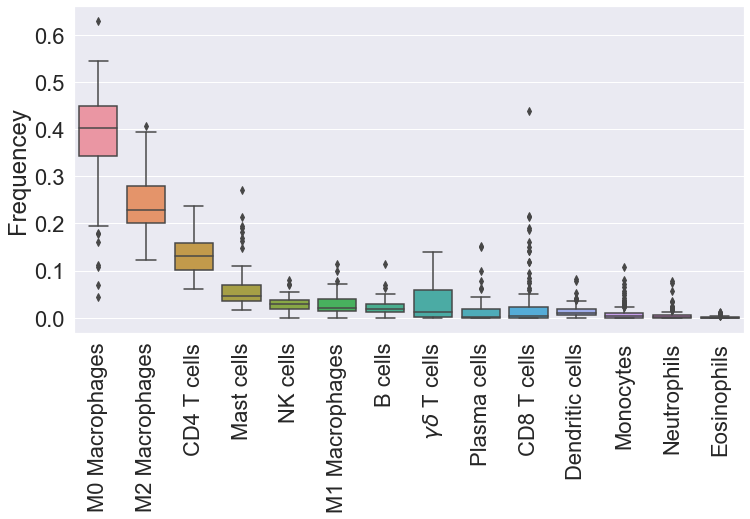

In [9]:
sns.set(rc={'figure.figsize':(12,6)})
sns.set(style="white")
sns.set(font_scale=2)
sns.boxplot(x="variable", y="value", data=pd.melt(cd))
plt.xlabel('')

plt.xticks( rotation=90)
plt.ylabel('Frequencey')

In [10]:
clinical_cluster_df = pd.read_csv('Data/Clinical_data_cluster.csv')
clinical_cluster_df.set_index('Unnamed: 0', inplace=True)

def convert_huvos(x):
    if x=='4-Mar': return '3-4'
    elif x=='2-Jan': return '1-2'
    else: return x
    
clinical_cluster_df['Huvos_Grade'] = clinical_cluster_df['Huvos_Grade'].apply(lambda x: convert_huvos(x))
location_df = clinical_cluster_df[clinical_cluster_df.Tumor_Location_2.isin(['leg', 'arm'])]

cell_props_cluster = clinical_cluster_df[list(cell_types)+['Cluster']]

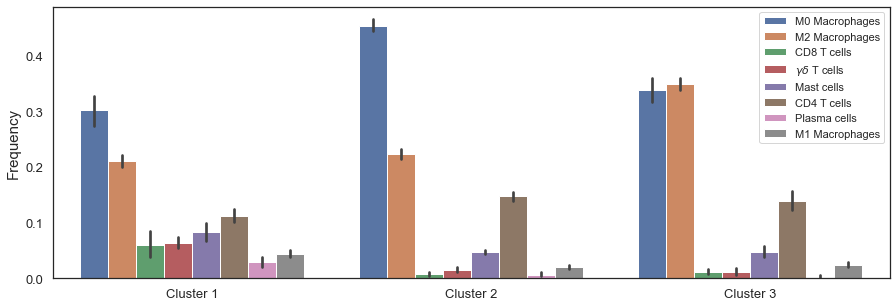

In [11]:
# Calculate variables with largest differences (by standard deviation)
# The higher the standard deviation in a variable based on average values for each cluster
# The more likely that the variable is important when creating the cluster

df_mean = cell_props_cluster.groupby('Cluster').mean().reset_index()
sns.set(style="white")

results = pd.DataFrame(columns=['Variable', 'Std'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.std(df_mean[column])]
selected_columns = list(results.sort_values('Std', ascending=False).head(8).Variable.values) + ['Cluster']

# Plot data
tidy = cell_props_cluster[selected_columns].melt(id_vars='Cluster')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='Cluster', y='value', hue='variable', data=tidy, order=['Cluster 1','Cluster 2','Cluster 3'])
plt.legend(loc='upper right')
ax.tick_params(labelsize=13)

plt.xlabel('')
plt.ylabel('Frequency',size=15)
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Cluster 1 v.s. Cluster 2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.972e-09 U_stat=2.573e+03
Cluster 2 v.s. Cluster 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.101e-05 U_stat=3.870e+02
Cluster 1 v.s. Cluster 3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=9.844e-02 U_stat=8.360e+02


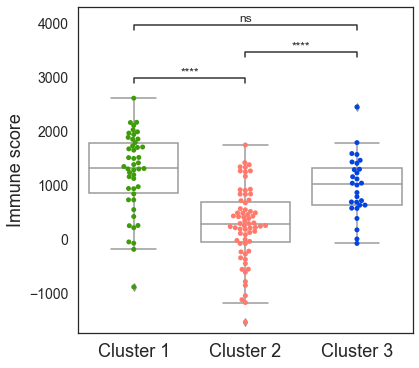

In [12]:
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")
palette={'Cluster 1':'#3F9B0B', 'Cluster 2':'#FF796C', 'Cluster 3':'#0343DF'}

ax=sns.boxplot(x='Cluster', y='ImmuneScore', data=clinical_cluster_df, order=['Cluster 1','Cluster 2','Cluster 3'], color='w')
sns.swarmplot(x='Cluster', y='ImmuneScore', data=clinical_cluster_df, order=['Cluster 1','Cluster 2','Cluster 3'], palette=palette, dodge=True)

#adding statistical values on the graph
add_stat_annotation(ax, data=clinical_cluster_df, x='Cluster', y='ImmuneScore', order=['Cluster 1','Cluster 2','Cluster 3'],
                    box_pairs=[('Cluster 1','Cluster 2'),('Cluster 1','Cluster 3'),('Cluster 2','Cluster 3')],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

plt.xlabel('', fontsize=2)
plt.xticks(rotation=0, fontsize=18)
plt.ylabel('Immune score', size=18)
plt.yticks(fontsize=14)
plt.show()

(141, 2)


C:\Users\Trang Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Trang Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(array([-15., -10.,  -5.,   0.,   5.,  10.,  15.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

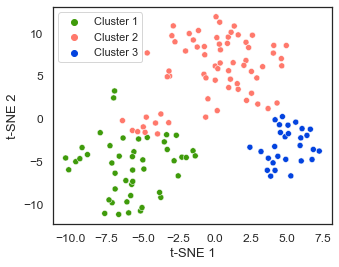

In [13]:
tsne = TSNE(n_components=2, perplexity=25, random_state=246)
immune_emb = tsne.fit_transform(clinical_df[cell_types])
print(immune_emb.shape)

tsne_df = clinical_cluster_df[['Cluster', 'Vital_Status']]
tsne_df['tsne_1'] = immune_emb[:,0]
tsne_df['tsne_2'] = immune_emb[:,1]

sns.set_style("white")
palette={'Cluster 1':'#3F9B0B', 'Cluster 2':'#FF796C', 'Cluster 3':'#0343DF'}

fig, ax = plt.subplots(figsize=(5,4))
sns.scatterplot(
    x="tsne_1", y="tsne_2",
    hue="Cluster", hue_order=['Cluster 1', 'Cluster 2', 'Cluster 3'],
    palette=palette,
    data=tsne_df,
    ax=ax,
    legend="brief",
)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels, fontsize=11)
plt.xlabel('t-SNE 1', fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel('t-SNE 2', fontsize=13)
plt.yticks(fontsize=12)

## Figure 2 A-J

In [14]:
def count_plot(clinical_df, feat, ylabel, dropna=False, order=None, palette=None, figsize=(8,5)):
    df=pd.DataFrame(columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])
    for i in df.columns:
        df[i]=clinical_df[clinical_df['Cluster']==i][feat].value_counts()
    if dropna: df.dropna(inplace=True)
    df=df.T
    print(df)
    a=df.sum(axis=1)
    df=df.div(a,axis=0)
    
    if order:
        df.columns = pd.CategoricalIndex(df.columns.values, ordered=True, categories=order)
    df = df.sort_index(axis=1)

    if not palette: palette=["darkgray","dimgray",'#516572','#000000']
    sns.set(rc={'figure.figsize':figsize})
    sns.set_style("white")

    ax=df.plot.bar(stacked=True, color=palette)
    ax.legend(loc='right', bbox_to_anchor=(1,1.05),
              fancybox=True, shadow=False, ncol=5,fontsize=15)

    plt.margins(x=0, y=0)
    plt.xlabel('', size=2)
    plt.xticks(rotation=0, fontsize=19)
    plt.ylabel(ylabel, size=19)
    plt.yticks(fontsize=16)
    plt.show()

            M   F
Cluster 1  28  18
Cluster 2  42  25
Cluster 3  15  13


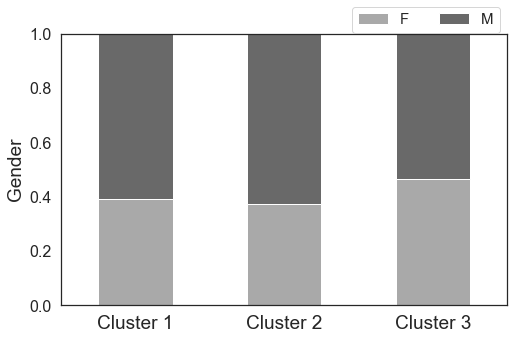

           no  yes
Cluster 1  37    9
Cluster 2  54   13
Cluster 3  22    6


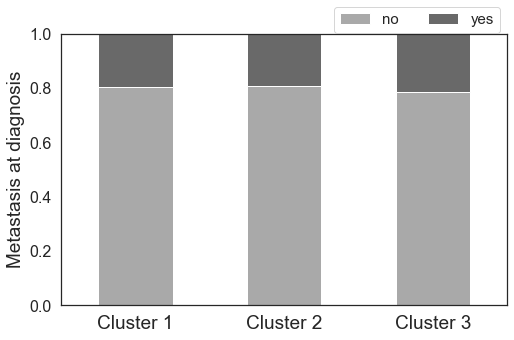

           Alive  Dead
Cluster 1     28    18
Cluster 2     38    27
Cluster 3     21     7


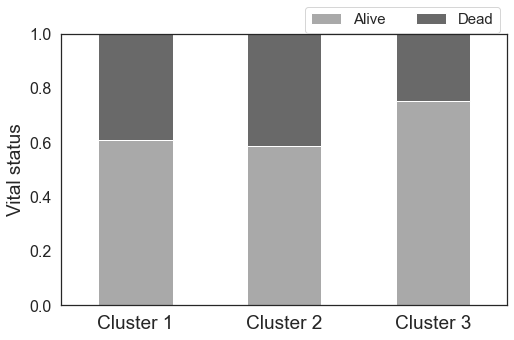

           1-2  3-4  unknown
Cluster 1   20   18        8
Cluster 2   27   12       28
Cluster 3    7    6       15


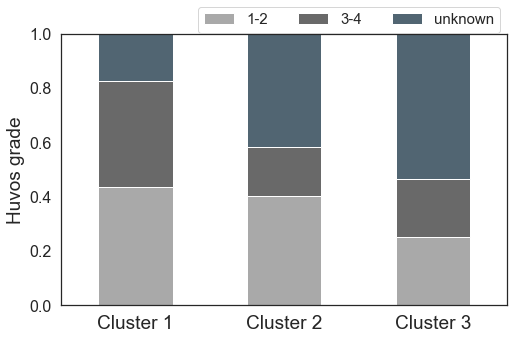

            leg  arm  unknown
Cluster 1  37.0  8.0      1.0
Cluster 2  56.0  5.0      1.0
Cluster 3  26.0  NaN      NaN


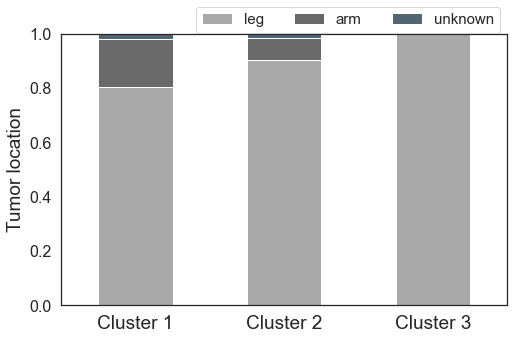

In [15]:
count_plot(clinical_cluster_df, 'Gender', 'Gender', order=['F','M'])

count_plot(clinical_cluster_df, 'Metastasis_at_diagnosis', 'Metastasis at diagnosis', order=['no','yes'])

count_plot(clinical_cluster_df, 'Vital_Status', 'Vital status', order=['Alive','Dead'])

count_plot(clinical_cluster_df, 'Huvos_Grade', 'Huvos grade', order=['1-2','3-4','unknown'])

count_plot(clinical_cluster_df, 'Tumor_Location_2', 'Tumor location', order=['leg','arm','unknown'])

In [16]:
def box_plot(clinical_df, feat, ylabel):
    df = clinical_df[clinical_df[feat]!='unknown']
    df[feat] = df[feat].astype(float)
    df['Cluster'] = df['Cluster'].astype(str)
    palette={'Cluster 1':'#3F9B0B', 'Cluster 2':'#FF796C', 'Cluster 3':'#0343DF'}
    
    sns.set(rc={'figure.figsize':(6,6)})
    sns.set_style('white')
    ax=sns.boxplot(x='Cluster', y=feat, data=df, order=['Cluster 1','Cluster 2','Cluster 3'], color='w')
    sns.swarmplot(x='Cluster', y=feat, data=df, order=['Cluster 1','Cluster 2','Cluster 3'], dodge=True, palette=palette)

    plt.xlabel('', size=2)
    plt.xticks(rotation=0, fontsize=20)
    plt.ylabel(ylabel, size=20)
    plt.yticks(fontsize=20)
    plt.show()

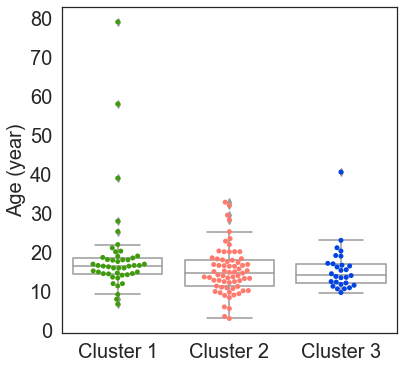

In [17]:
temp = clinical_cluster_df[clinical_cluster_df.Age_Month != 'unknown']
temp['Age_Month'] = temp['Age_Month'].astype(float)
temp['Age_Year'] = temp['Age_Month']/12
box_plot(temp, 'Age_Year', 'Age (year)')

In [18]:
def Kaplan_by_cluster(clinical_df, survival_time_col):
    from lifelines import KaplanMeierFitter
    
    df = clinical_df[clinical_df[survival_time_col] != 'unknown']
    df[survival_time_col] = df[survival_time_col].astype(float)
    df['dead'] = df['Vital_Status'].apply(lambda x: 1 if x=='Dead' else 0)
    
    ## create a kmf object
    kmf = KaplanMeierFitter() 
    palette={'Cluster 1':'#3F9B0B', 'Cluster 2':'#FF796C', 'Cluster 3':'#0343DF'}

    ## Fit the data into the model
    fig, ax = plt.subplots(figsize=(6,4))
    for c in ['Cluster 1', 'Cluster 2', 'Cluster 3']:
        kmf.fit(durations=df[df.Cluster==c][survival_time_col], event_observed=df[df.Cluster==c]['dead'], label=c)
        kmf.plot(ax=ax, ci_show=False, color=palette)
    
    plt.legend(prop={'size': 11.5})
    plt.xlabel('Time (year)', fontsize=13.5)
    plt.ylabel('Overall survival rate', fontsize=13.5)
    plt.show()

C:\Users\Trang Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Trang Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


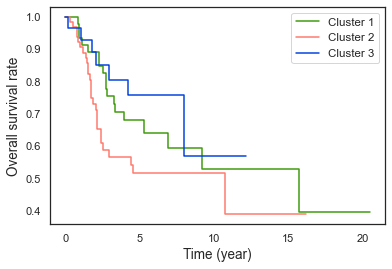

In [19]:
df = clinical_cluster_df[clinical_cluster_df['Survival_Months_2'] != 'unknown']
df['Survival_Months_2'] = df['Survival_Months_2'].astype(float)
df['Survival_Years'] = df['Survival_Months_2']/12

Kaplan_by_cluster(df, 'Survival_Years')

In [20]:
def chi_square_test(clinical_df, x, y):
    from scipy.stats import chi2_contingency

    cols = clinical_df[clinical_df[x]!='unknown'][x].unique()
    df=pd.DataFrame(columns=cols)
    for val in cols:
        df[val] = clinical_df[(clinical_df[x]==val) & (clinical_df[y]!='unknown')][y].value_counts()
    df.fillna(0, inplace=True)

    for i in range(df.shape[1]):
        for j in range(i+1, df.shape[1]):
            contigency_table = df[[df.columns[i], df.columns[j]]].T        
            pval = chi2_contingency(contigency_table)[1]
            print(contigency_table)
            print('Cluster', df.columns[i], 'vs', df.columns[j])
            print('p-value = ', pval)
            if pval < 0.05:
                print('There is significant difference in', y, 'between', x, df.columns[i], 'and', df.columns[j], '\n')
    

In [21]:
def stack_bar(clinical_df, x, y, xlabel, ylabel, figsize=(6.5,5), order=None, pallete=None):
    if order: cols = order
    else: cols = clinical_df[clinical_df[x]!='unknown'][x].unique()
    df=pd.DataFrame(columns=cols)
    for val in cols:
        df[val] = clinical_df[(clinical_df[x]==val) & (clinical_df[y]!='unknown')][y].value_counts()

    df.dropna(inplace=True)
    df=df.T
    print('\n', df)
    
    a=df.sum(axis=1)
    df=df.div(a,axis=0)
    print(df)

    if not pallete: palette=["darkgray","dimgray",'#516572','#000000']

    sns.set(rc={'figure.figsize':figsize})
    sns.set_style("white")

    ax=df.plot.bar(stacked=True, color=palette)
    ax.legend(loc='right', bbox_to_anchor=(1,1.05),
              fancybox=True, shadow=False, ncol=4,fontsize=15)

    plt.margins(x=0, y=0)
    plt.xticks(rotation=0)
    plt.xlabel(xlabel, size=19)
    plt.ylabel(ylabel, size=19)
    plt.yticks(fontsize=14)
    plt.xticks(fontsize=17)
    plt.show()


      Alive  Dead
no      78    34
yes      9    18
        Alive      Dead
no   0.696429  0.303571
yes  0.333333  0.666667


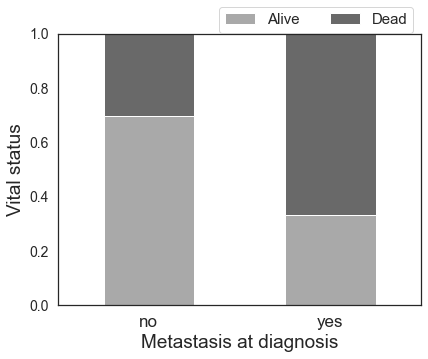

     Dead  Alive
yes    18      9
no     34     78
Cluster yes vs no
p-value =  0.0010440414935876017
There is significant difference in Vital_Status between Metastasis_at_diagnosis yes and no 


      Alive  Dead
1-2     29    25
3-4     28     8
        Alive      Dead
1-2  0.537037  0.462963
3-4  0.777778  0.222222


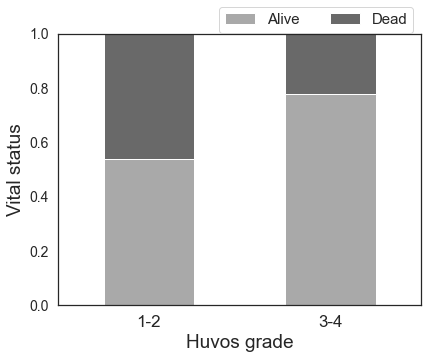

     Alive  Dead
3-4     28     8
1-2     29    25
Cluster 3-4 vs 1-2
p-value =  0.03585668474703799
There is significant difference in Vital_Status between Huvos_Grade 3-4 and 1-2 


      1-2  3-4
leg   45   35
arm    7    1
        1-2     3-4
leg  0.5625  0.4375
arm  0.8750  0.1250


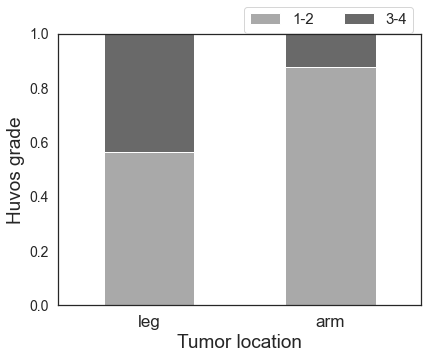

     1-2  3-4
leg   45   35
arm    7    1
Cluster leg vs arm
p-value =  0.18123105997129402


In [22]:
stack_bar(clinical_cluster_df, 'Metastasis_at_diagnosis', 'Vital_Status', 'Metastasis at diagnosis', 'Vital status',
          order=['no','yes'])
chi_square_test(clinical_cluster_df, 'Metastasis_at_diagnosis', 'Vital_Status')

stack_bar(clinical_cluster_df, 'Huvos_Grade', 'Vital_Status', 'Huvos grade', 'Vital status', order=['1-2','3-4'])
chi_square_test(clinical_cluster_df, 'Huvos_Grade', 'Vital_Status')

stack_bar(location_df, 'Tumor_Location_2', 'Huvos_Grade', 'Tumor location', 'Huvos grade', order=['leg','arm'])
chi_square_test(location_df, 'Tumor_Location_2', 'Huvos_Grade')

## Figure 2K, 3D, 4C-F

In [23]:
def feat_immune_plot(clinical_df, feat, cell, ylabel=None, xlabel=None, figsize=(5,5), order=None):
    df = clinical_df[clinical_df[feat]!='unknown']
    vals = df[feat].unique()
    
    palette=["darkgray","dimgray",'#516572','#000000']
    
    sns.set(rc={'figure.figsize':figsize})
    sns.set_style("white")
    if order: 
        ax=sns.boxplot(x=feat, y=cell, data=df, order=order, color='w')
        sns.swarmplot(x=feat, y=cell, data=df, order=order, palette=palette, dodge=False)
    else: 
        ax=sns.boxplot(x=feat, y=cell, data=df, color='w')
        sns.swarmplot(x=feat, y=cell, data=df, palette=palette, dodge=False)
    
    #adding statistical values on the graph
    add_stat_annotation(ax, data=df, x=feat, y=cell, order=vals,
                        box_pairs=[tuple(vals)],
                        test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
    if ylabel: plt.ylabel(ylabel, fontsize=15)
    if xlabel: plt.xlabel(xlabel, fontsize=15)
    plt.xticks(fontsize=13)
    plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

F v.s. M: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.270e-04 U_stat=1.504e+03


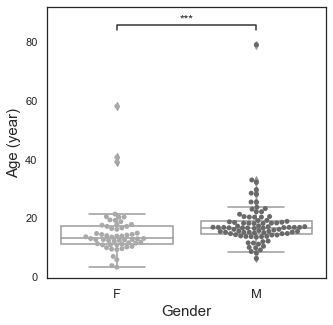

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Alive v.s. Dead: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.035e-02 U_stat=2.694e+03


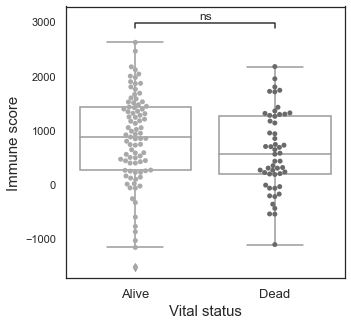

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

3-4 v.s. 1-2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.460e-02 U_stat=1.229e+03


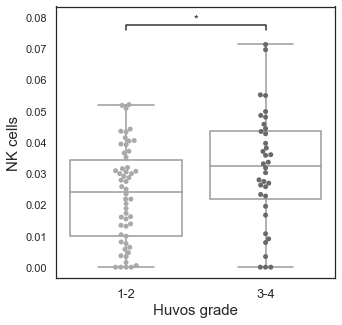

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

leg v.s. arm: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.610e-02 U_stat=5.155e+02


C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


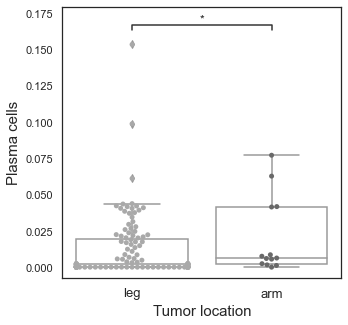

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

leg v.s. arm: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.305e-02 U_stat=4.940e+02


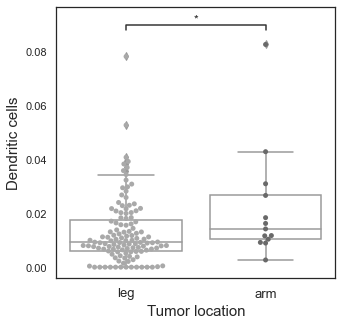

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

F v.s. M: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.564e-03 U_stat=3.112e+03


C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 30.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


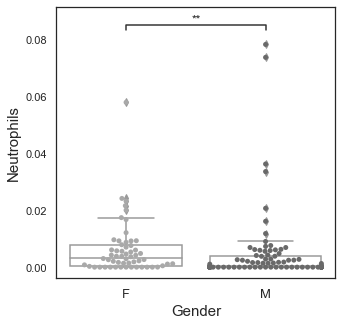

In [24]:
temp = clinical_df[clinical_df.Age_Month != 'unknown']
temp['Age_Month'] = temp['Age_Month'].astype(float)
temp['Age_Year'] = temp['Age_Month']/12

feat_immune_plot(temp, 'Gender', 'Age_Year', ylabel='Age (year)', xlabel='Gender', order=['F','M'])

feat_immune_plot(clinical_cluster_df, 'Vital_Status', 'ImmuneScore', ylabel='Immune score', xlabel='Vital status')

feat_immune_plot(clinical_cluster_df, 'Huvos_Grade', 'NK cells', ylabel='NK cells', xlabel='Huvos grade', order=['1-2','3-4'])

feat_immune_plot(location_df, 'Tumor_Location_2', 'Plasma cells', ylabel='Plasma cells', xlabel='Tumor location', 
                 order=['leg','arm'])

feat_immune_plot(location_df, 'Tumor_Location_2', 'Dendritic cells', ylabel='Dendritic cells', xlabel='Tumor location', 
                 order=['leg','arm'])

feat_immune_plot(clinical_cluster_df, 'Gender', 'Neutrophils', ylabel='Neutrophils', xlabel='Gender', order=['F','M'])

## Figure 3 A-C, E-F

In [25]:
vital_cells = ['$\gamma \delta$ T cells', 'Mast cells', 'Dendritic cells', 'NK cells', 'CD8 T cells']
df1 = clinical_cluster_df[vital_cells + ['Vital_Status']]
vital_df = pd.DataFrame(columns=['Fraction', 'Vital_Status', 'Cell_type'])

for cell in vital_cells:
    temp = df1[[cell, 'Vital_Status']]
    temp = temp.rename(columns={cell: 'Fraction'})
    temp['Cell_type'] = [cell]*temp.shape[0]
    vital_df = pd.concat([vital_df, temp], axis=0)

C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


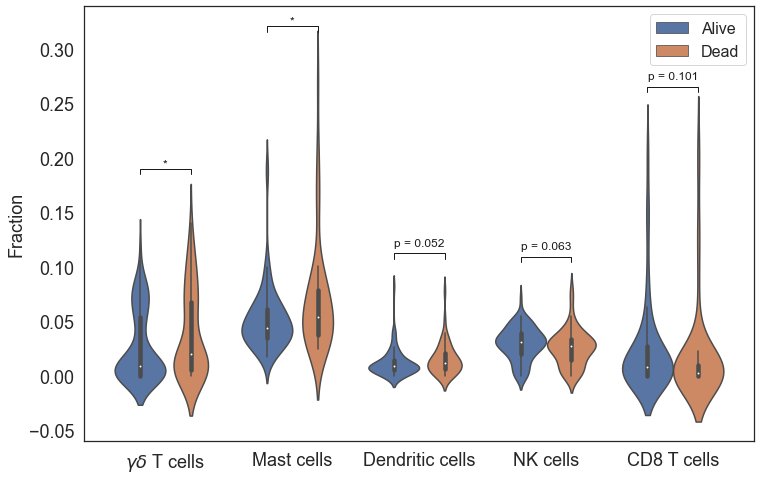

In [26]:
clinical = vital_df[vital_df.Fraction < 0.4]
x, y, z = 'Cell_type', 'Fraction', 'Vital_Status'

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("white")

clinical = clinical[clinical[z] != 'unknown']
vals = clinical[clinical[x] != 'unknown'][x].unique()
ax = sns.violinplot(x, y, hue=z, data=clinical)
plt.xticks(rotation=0)

# stat annotation for col 0
x1 = 0
y1, h, col = clinical[clinical[x]=='$\gamma \delta$ T cells'][y].max() + 0.045, 0.005, 'k'
plt.plot([x1-0.2, x1-0.2, x1+0.2, x1+0.2], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text(x1, y1+h, "*", ha='center', va='bottom', color=col)

# stat annotation for col 1
x1 = 1
y1, h, col = clinical[clinical[x]=='Mast cells'][y].max() + 0.045, 0.005, 'k'
plt.plot([x1-0.2, x1-0.2, x1+0.2, x1+0.2], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text(x1, y1+h, "*", ha='center', va='bottom', color=col)

# stat annotation for col 2
x1 = 2
y1, h, col = clinical[clinical[x]=='Dendritic cells'][y].max() + 0.025, 0.005, 'k'
plt.plot([x1-0.2, x1-0.2, x1+0.2, x1+0.2], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text(x1, y1+h+0.005, "p = 0.052", ha='center', va='bottom', color=col)

# stat annotation for col 3
x1 = 3
y1, h, col = clinical[clinical[x]=='NK cells'][y].max() + 0.025, 0.005, 'k'
plt.plot([x1-0.2, x1-0.2, x1+0.2, x1+0.2], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text(x1, y1+h+0.005, "p = 0.063", ha='center', va='bottom', color=col)

# stat annotation for col 4
x1 = 4
y1, h, col = clinical[clinical[x]=='CD8 T cells'][y].max() + 0.045, 0.005, 'k'
plt.plot([x1-0.2, x1-0.2, x1+0.2, x1+0.2], [y1, y1+h, y1+h, y1], lw=1, c=col)
plt.text(x1, y1+h+0.005, "p = 0.101", ha='center', va='bottom', color=col)

handles, labels = ax.get_legend_handles_labels()
plt.legend(fontsize=16)
plt.xlabel('', size=2)
plt.ylabel(y, size=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

plt.show()

In [27]:
def Kaplan_by_cell(clinical_df, cell, survival_time_col):
    from lifelines import KaplanMeierFitter
    from lifelines.statistics import logrank_test
    
    df = clinical_df[clinical_df[survival_time_col] != 'unknown']
    df[survival_time_col] = df[survival_time_col].astype(float)
    df['dead'] = df['Vital_Status'].apply(lambda x: 1 if x=='Dead' else 0)
    cell_med = np.median(df[cell])
    df['level'] = df[cell].apply(lambda x: 'high' if x > cell_med else 'low')
    
    ## create a kmf object
    kmf = KaplanMeierFitter() 

    ## Fit the data into the model
    timeA, timeB = df[df.level=='high'][survival_time_col], df[df.level=='low'][survival_time_col]
    eventA, eventB = df[df.level=='high']['dead'], df[df.level=='low']['dead']
    
    fig, ax = plt.subplots(figsize=(6,4))
    kmf.fit(durations=timeA, event_observed=eventA, label='High '+cell)
    kmf.plot(ax=ax, ci_show=False)

    kmf.fit(durations=timeB, event_observed=eventB, label='Low '+cell)
    kmf.plot(ax=ax, ci_show=False)
    
    plt.legend(prop={'size': 11.5})
    plt.xlabel('Time (year)', fontsize=13.5)
    plt.ylabel('Overall survival rate', fontsize=13.5)
    plt.show()
    
    results = logrank_test(timeA, timeB, event_observed_A=eventA, event_observed_B=eventB)
    results.print_summary()

C:\Users\Trang Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Trang Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


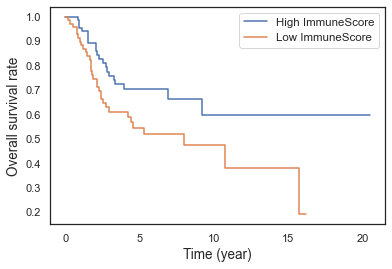

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.83 0.03      5.16

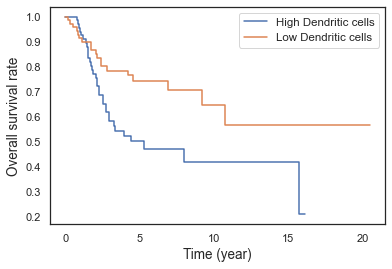

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           7.07 0.01      7.00

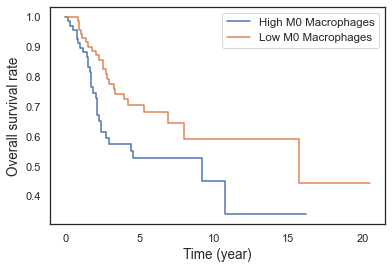

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.07 0.04      4.51

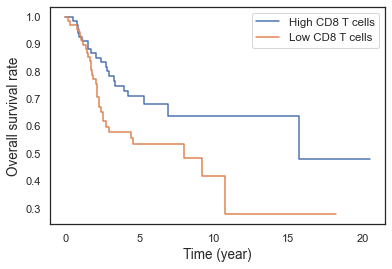

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           4.41 0.04      4.81

In [28]:
df = clinical_cluster_df[clinical_cluster_df['Survival_Months_2'] != 'unknown']
df['Survival_Months_2'] = df['Survival_Months_2'].astype(float)
df['Survival_Years'] = df['Survival_Months_2']/12

for cell in ['ImmuneScore', 'Dendritic cells', 'M0 Macrophages', 'CD8 T cells']:
    Kaplan_by_cell(df, cell, 'Survival_Years')

## Figure 4 A-B

In [29]:
def Kaplan_metastasis_by_cell(clinical_df, cell, event_time_col='metastasis_dead_time'):
    from lifelines import KaplanMeierFitter
    from lifelines.statistics import logrank_test
    
    df = clinical_df[clinical_df[event_time_col] != 'unknown']
    df[event_time_col] = df[event_time_col].astype(float)
    cell_med = np.median(df[cell])
    df['level'] = df[cell].apply(lambda x: 'high' if x > cell_med else 'low')
    
    ## create a kmf object
    kmf = KaplanMeierFitter() 

    ## Fit the data into the model
    timeA, timeB = df[df.level=='high'][event_time_col], df[df.level=='low'][event_time_col]
    eventA, eventB = df[df.level=='high']['metastasis_dead'], df[df.level=='low']['metastasis_dead']
    
    fig, ax = plt.subplots(figsize=(6,4))
    kmf.fit(durations=df[df.level=='high'][event_time_col], event_observed=df[df.level=='high']['metastasis_dead'], label='High '+cell)
    kmf.plot(ax=ax, ci_show=False)

    kmf.fit(durations=df[df.level=='low'][event_time_col], event_observed=df[df.level=='low']['metastasis_dead'], label='Low '+cell)
    kmf.plot(ax=ax, ci_show=False)
    
    plt.legend(prop={'size': 11.5})
    plt.xlabel('Time (year)', fontsize=13.5)
    plt.ylabel('Metastasis-free survival rate', fontsize=13.5)
    plt.show()
    
    results = logrank_test(timeA, timeB, event_observed_A=eventA, event_observed_B=eventB)
    results.print_summary()

In [30]:
GSE21257_df = clinical_cluster_df[clinical_cluster_df.Data_Source=='GSE21257']

for i in GSE21257_df.index:
    if GSE21257_df.Vital_Status[i] == 'Dead' or GSE21257_df.Metastasis[i] == 'yes':
        GSE21257_df.loc[i, 'metastasis_dead'] = 1
    else: GSE21257_df.loc[i, 'metastasis_dead'] = 0
        
for i in GSE21257_df.index:
    if GSE21257_df.Metastasis[i] == 'no':
        GSE21257_df.loc[i, 'metastasis_dead_time'] = GSE21257_df.loc[i, 'Survival_Months_2']
    else:
        GSE21257_df.loc[i, 'metastasis_dead_time'] = min(int(GSE21257_df.loc[i, 'Survival_Months_2']), 
                                                         int(GSE21257_df.loc[i, 'Metastasis_time']))
        
GSE21257_df['metastasis_dead_time'] = GSE21257_df['metastasis_dead_time'].astype(int)
GSE21257_df['metastasis_dead_time'] = GSE21257_df['metastasis_dead_time']/12

C:\Users\Trang Le\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Trang Le\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Trang Le\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

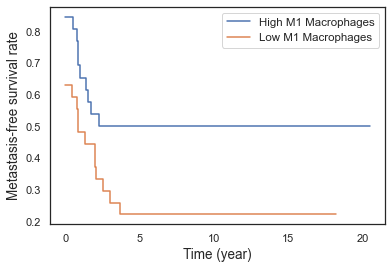

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.99 0.05      4.45

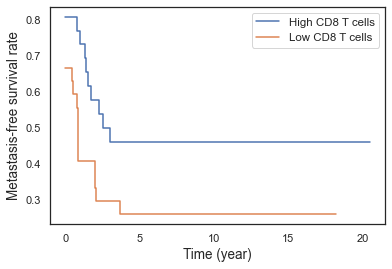

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.11 0.08      3.68

In [31]:
for cell in ['M1 Macrophages', 'CD8 T cells']:
    Kaplan_metastasis_by_cell(GSE21257_df, cell)

## Figure 5

In [32]:
def protein_by_cluster(df, y):
    sns.set(rc={'figure.figsize':(6,4)})
    sns.set_style("white")
    palette={'Cluster 1':'#3F9B0B', 'Cluster 2':'#FF796C', 'Cluster 3':'#0343DF'}

    ax=sns.boxplot(x='Cluster', y=y, data=df, order=['Cluster 1','Cluster 2','Cluster 3'], color='w')
    sns.swarmplot(x='Cluster', y=y, data=df, order=['Cluster 1','Cluster 2','Cluster 3'], palette=palette, dodge=True)

    plt.xlabel('', fontsize=2)
    plt.xticks(rotation=0, fontsize=13)
    plt.ylabel(y+'Gene Expression Level', size=13)
    plt.yticks(fontsize=12)
    plt.show()

TARGET


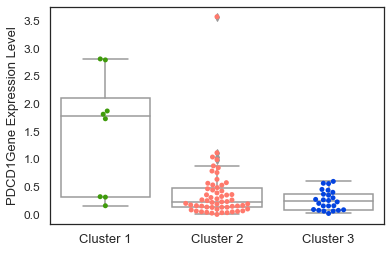

C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


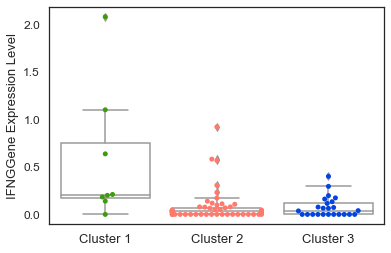

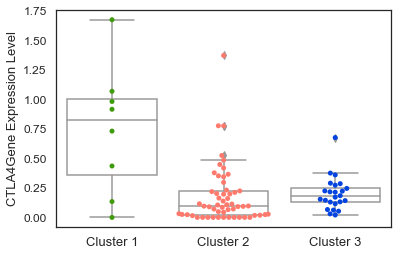

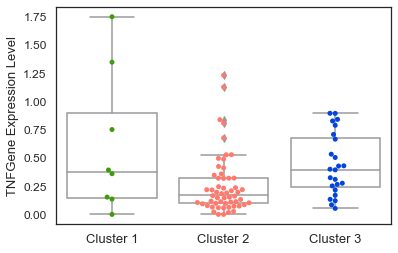

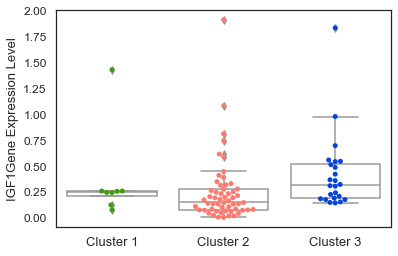

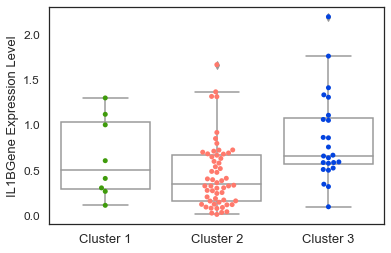

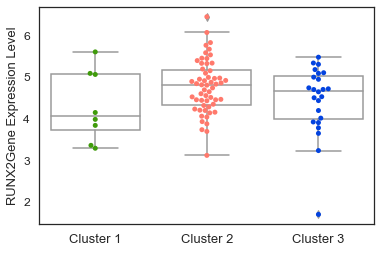

GSE21257


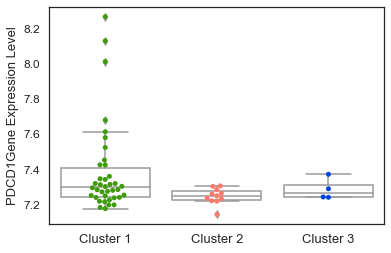

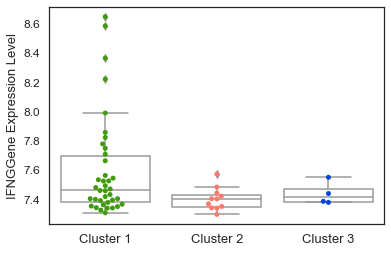

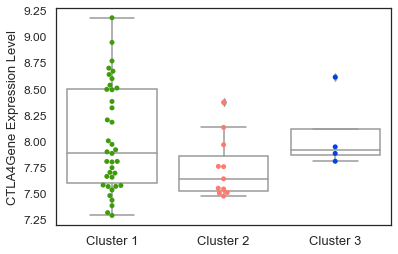

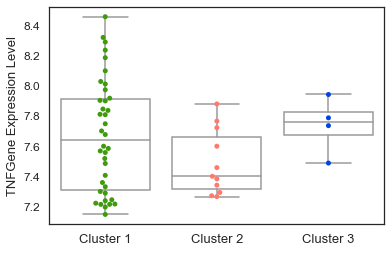

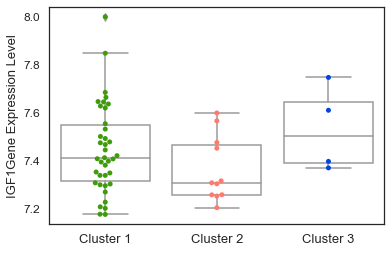

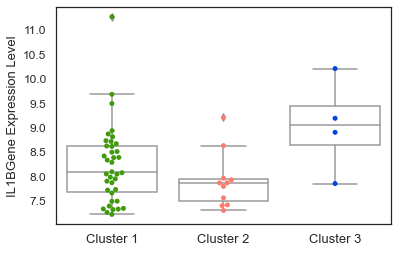

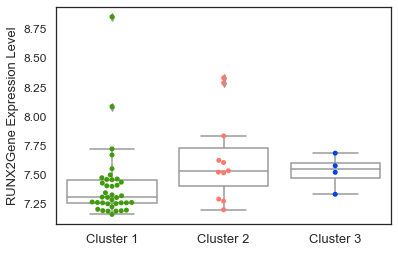

In [33]:
for dataset in ['TARGET', 'GSE21257']:
    print(dataset)
    for protein in ['PDCD1','IFNG','CTLA4','TNF','IGF1','IL1B','RUNX2']:
        protein_by_cluster(clinical_cluster_df[clinical_cluster_df['Data_Source']==dataset], protein)

## Figure 6

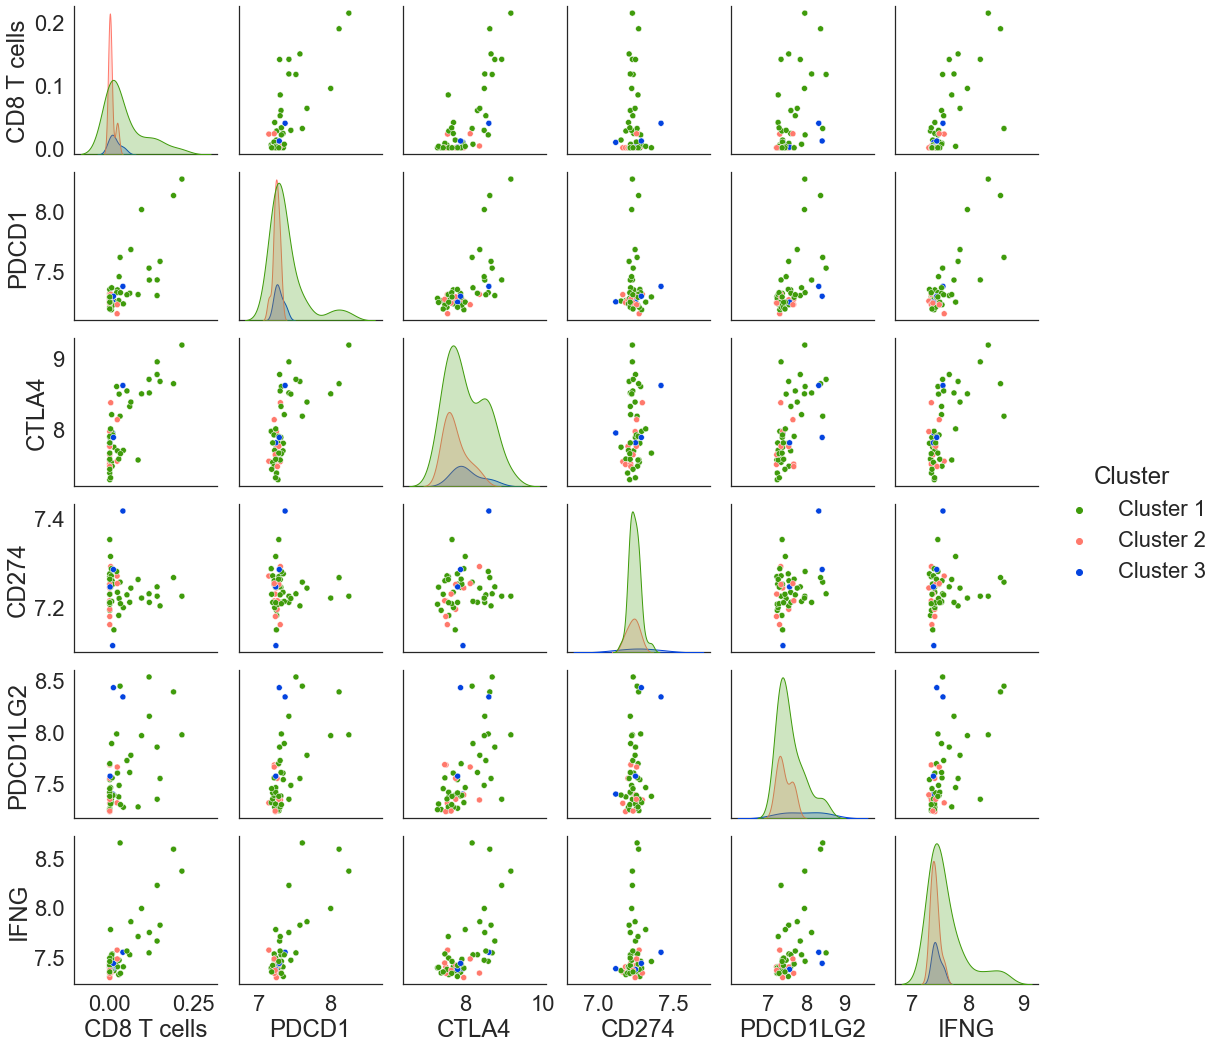

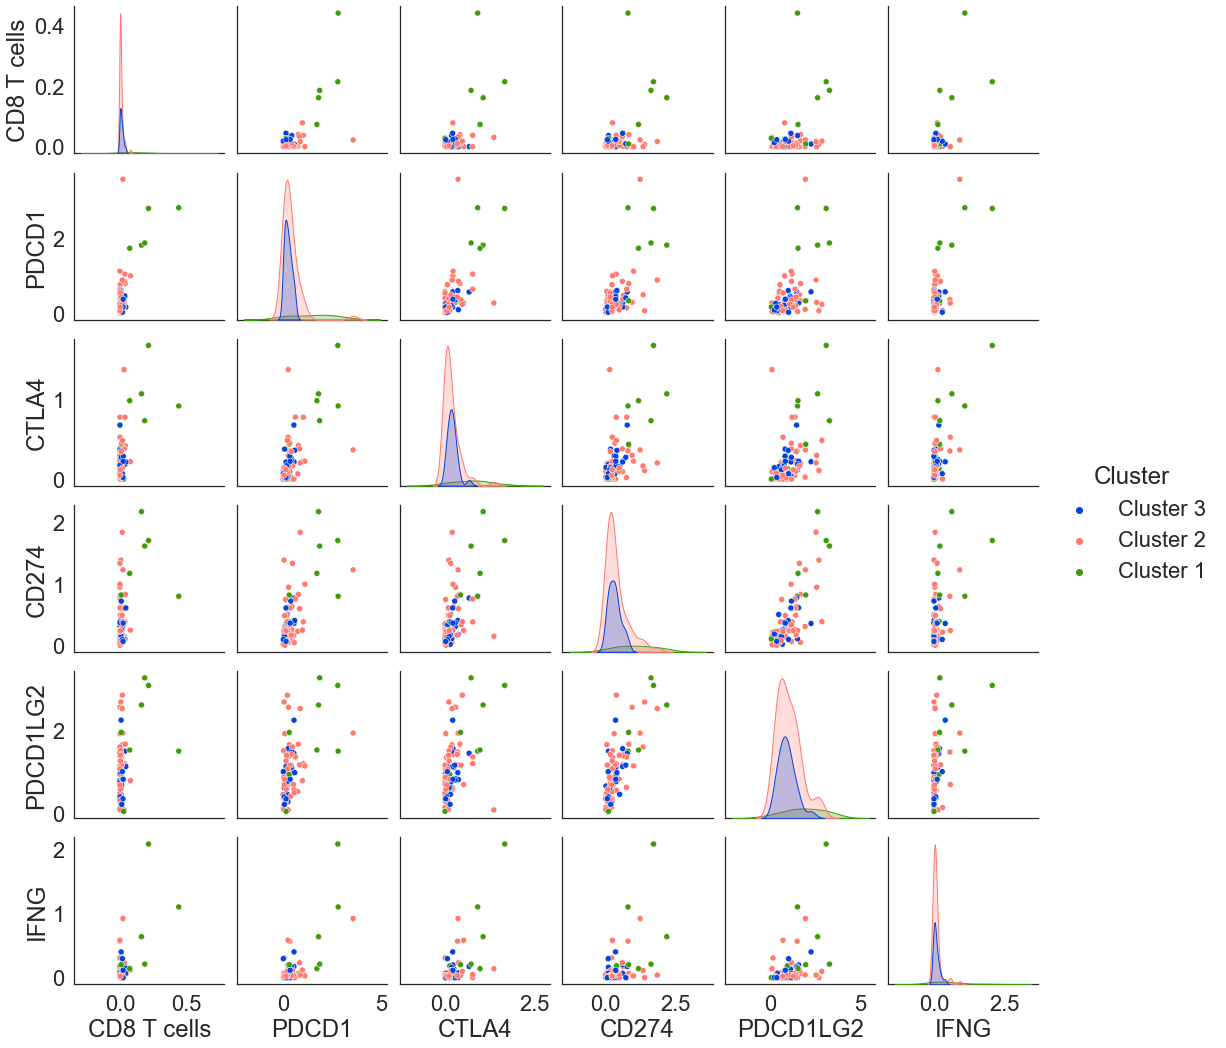

In [34]:
sns.set(rc={'figure.figsize':(8,8)}, font_scale=2)
sns.set_style("white")
palette={'Cluster 1':'#3F9B0B', 'Cluster 2':'#FF796C', 'Cluster 3':'#0343DF'}

for dataset in ['TARGET', 'GSE21257']:
    dat = clinical_cluster_df[clinical_cluster_df['Data_Source']!=dataset]
    sns.pairplot(dat[['CD8 T cells','PDCD1','CTLA4','CD274','PDCD1LG2','IFNG','Cluster']], hue='Cluster', palette=palette)
    plt.show()